In [1]:
import numpy as np
import matplotlib.pyplot as plt
from three_body_system import ThreeBodySystem, ThreeBodySimulator
from plotting import load_simulation_data, plot_energy_momentum, plot_3d_trajectories, plot_relative_distances
from animate import ThreeBodyAnimation, load_animate_data

## Testing

In [2]:
masses = [1.9885e30, 5.972e24, 7.342e22]  # Sun, Earth, Moon

UA = 1.496e11
initial_positions = [
    [0.0, 0.0, 0.0],                      # Sol
    [UA, 0.0, 0.0],                 # Tierra a 1 UA
    [UA + 3.844e8, 0.0, 0.0]        # Luna a 384,400 km
]

initial_velocities = [
    [0.0, 0.0, 0.0],                      # Sol (fijo)
    [0.0, 29.78e3, 0.0],                  # Tierra (29.78 km/s)
    [0.0, 29.78e3 + 1.022e3, 0.0]         # Luna (+1.022 km/s orbital)
]

dt = 3600 * 6  # 6 horas 
t_max = 86400 * 30 * 12 * 2  # (1 day) * (30) * (12) * 1.5 = 1.5 years
filename = "sun_earth_moon_test"

In [3]:
sem_system = ThreeBodySystem(  # sem: Sun - Earth - Moon System
        masses=masses,
        initial_positions=initial_positions,
        initial_velocities=initial_velocities
    )
simulator = ThreeBodySimulator(sem_system, filename)
simulator.simulate(t_max, dt)

simulation_data = load_simulation_data(filename)

Simulación completada. Datos guardados en data/sun_earth_moon_test.dat


In [9]:
test_data = load_simulation_data("sun_earth_moon_test")  #plotting data
test_animate_data = load_animate_data("sun_earth_moon_test")

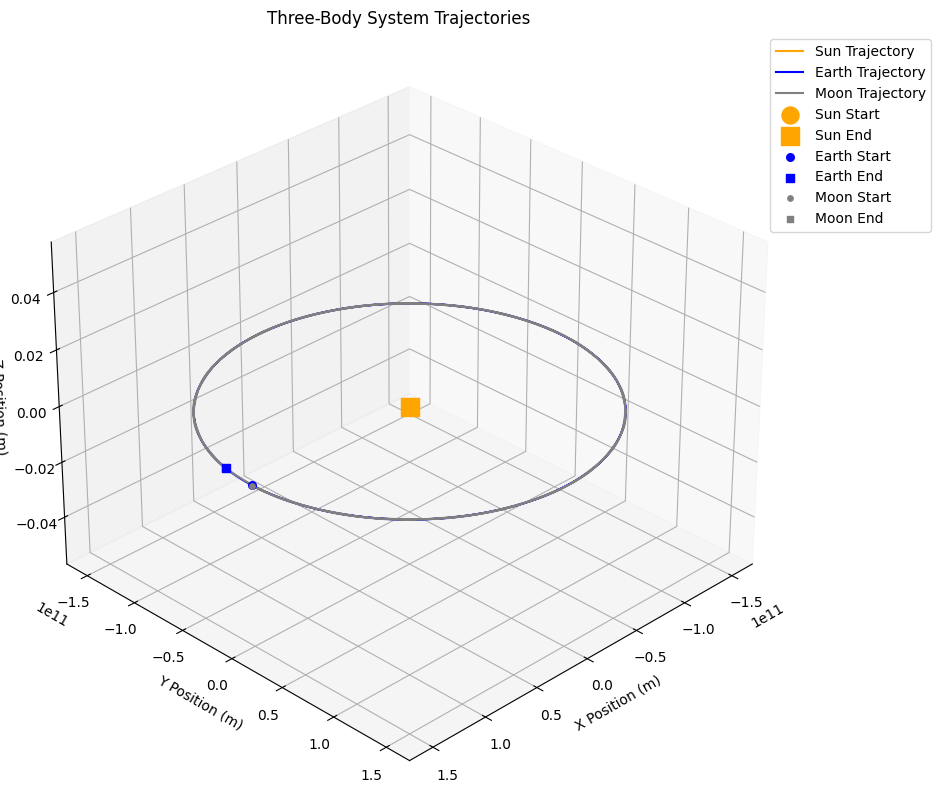

In [8]:
plot_3d_trajectories(
    test_data, 
    show=True, inital_final=True
)

Guardando animación en animations/sun_earth_moon_test.mp4...


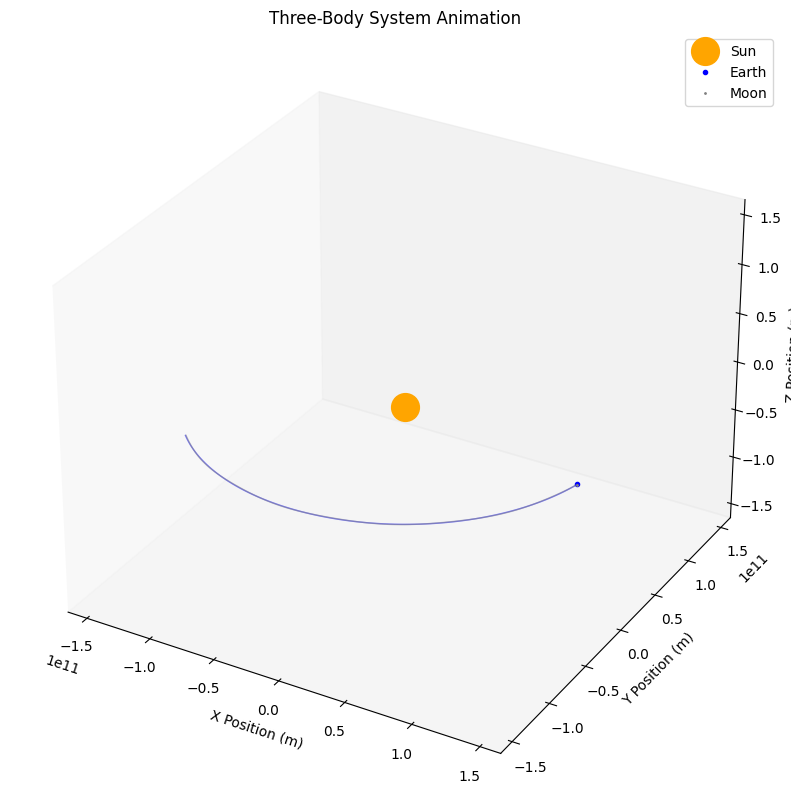

In [11]:
# Animate: 
animation = ThreeBodyAnimation(
        test_animate_data,
        body_names=['Sun', 'Earth', 'Moon'],
        colors=['orange', 'blue', 'gray'],
        sizes=[200, 30, 10],
        trail_length=100,
        interval=50
    )
    
animation.animate(save=True, filename="sun_earth_moon_test")

## Ramdom

In [ ]:
G = 6.67430e-11

m_star = 1.989e30  # Masa solar (x2 estrellas)
m_bh = 8.0e36      # Agujero negro supermasivo (~4 millones de masas solares)

# Posiciones (m)
R_binary = 1.496e11  # 1 UA (distancia entre estrellas binarias)
R_bh = 1.496e13      # 100 UA del centro binario (lejano)

# Velocidades (m/s)
v_binary = np.sqrt(G * (2*m_star) / (R_binary/2))  # Velocidad orbital para binaria
v_bh = np.sqrt(G * (2*m_star + m_bh) / R_bh)       # Velocidad para órbita del BH

masses = [m_star, m_star, m_bh]
initial_positions = [
    [-R_binary/2, 0.0, 0.0],  # Estrella 1
    [R_binary/2, 0.0, 0.0],    # Estrella 2
    [0.0, R_bh, 0.0]           # Agujero negro
]
initial_velocities = [
    [0.0, -v_binary, 0.0],     # Estrella 1
    [0.0, v_binary, 0.0],      # Estrella 2
    [-v_bh, 0.0, 0.0]          # Agujero negro (órbita circular)
]

dt = 86400                     # 1 día (paso más pequeño)
t_max = 86400 * 365 * 5        # 5 años
filename = "binary_blackhole_corrected"

In [5]:
system = ThreeBodySystem(
        masses=masses,
        initial_positions=initial_positions,
        initial_velocities=initial_velocities
    )
simulator = ThreeBodySimulator(system, filename)
simulator.simulate(t_max, dt)

simulation_data = load_simulation_data(filename)

Simulación completada. Datos guardados en data/binary_blackhole_corrected.dat


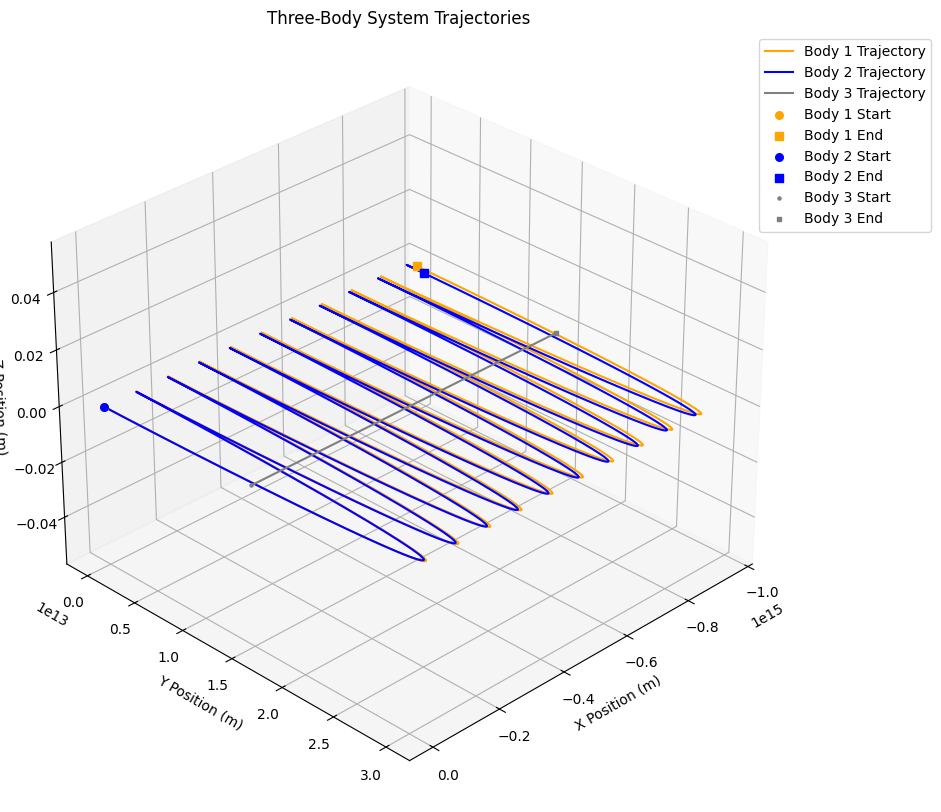

In [6]:
plot_3d_trajectories(
    load_simulation_data(filename), 
    body_sizes=[30, 30, 5],
    show=True, inital_final=True
)

Guardando animación en animations/binary_blackhole_corrected.mp4...


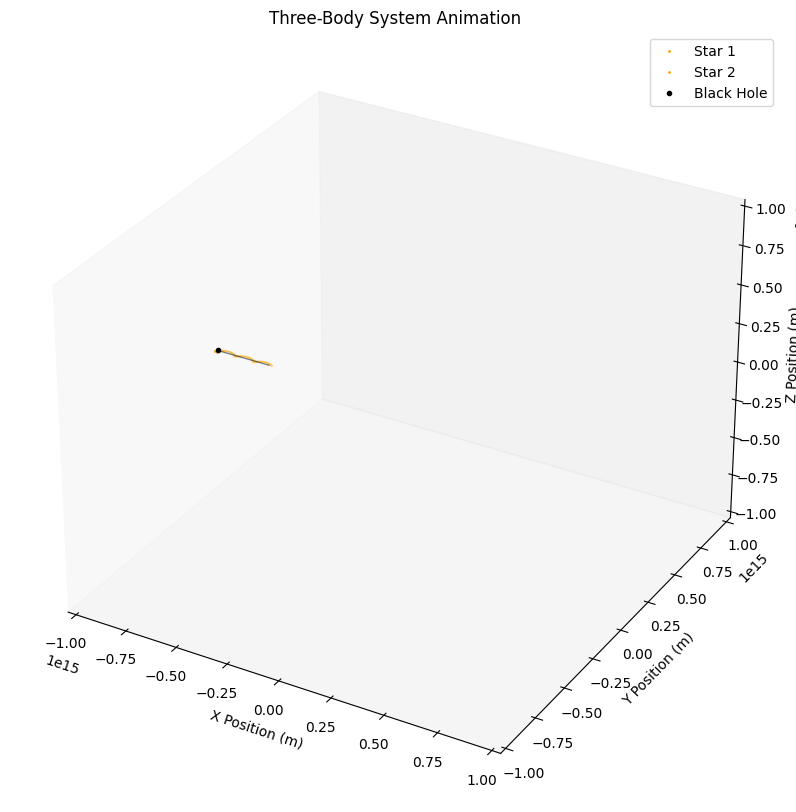

In [10]:
animation = ThreeBodyAnimation(
        load_animate_data("binary_blackhole_corrected"),
        body_names=['Star 1', 'Star 2', 'Black Hole'],
        colors=['orange', 'orange', 'black'],
        sizes=[10, 10, 30],
        trail_length=100,
        interval=50
    )
    
animation.animate(save=True, filename="binary_blackhole_corrected")